In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from wbForensicsHOG import wbForensicsHOG
import params.config as config
import os

%matplotlib notebook

In [2]:
## Blot cutter
dr = 'Projects/test_multipliers/image'
fingerprint = np.load("Projects/image_test_eBik/saves/fingerprint.npy").item()
## Thresh Blot cutter
dr_thresh = 'Projects/test_multipliers/image_thresh'
fingerprint = np.load("Projects/image_test_eBik/saves/fingerprint.npy").item()
# ## SIFT
# dr_sift = 'Projects/test_multipliers/sift'
# fingerprint = np.load("Projects/sift_test_eBik/saves/fingerprint.npy").item()

if not os.path.exists(dr):
    os.mkdir(dr)

## Get refenrece analyses

In [ ]:
def run(Forensics, save_file):
    Forensics.d_rank(pairs=Forensics.pairs, ratios=Forensics.ratios, distances=Forensics.dists)
    Forensics.assign_match_label(pairs=Forensics.Dist_Rank["image_match_pairs"], 
                                 distances = Forensics.Dist_Rank["image_match_dists"], 
                                 ratios=Forensics.Dist_Rank["image_match_ratios"],
                                 ASSIGNMENT= config.match_type)
    
    np.save(save_file, Forensics.truth_values)
    print("Completed analysis for multiplier: {}".format(config.multiplier_num_sum))
    
    

In [ ]:
config.match_type = "image"
multipliers = np.arange(0,101,10)
multipliers

## No threhsold

In [ ]:
config.r_T = None 
Forensics = wbForensicsHOG(fingerprint)
Forensics.KDTree_pairs(len(fingerprint["feature_vectors"])+1)

# config.accum_type = 'weighted'
# for m in multipliers:
#     config.multiplier_num_sum = m
#     save_file = dr + '/reference_analysis_' + str(m)
#     run(Forensics, save_file)
    
config.accum_type = 'mean'
config.multiplier_num_sum = 'mean'
save_file = dr + '/reference_analysis_mean'
run(Forensics, save_file )

## With threshold

In [ ]:
config.r_T = 1.02
Forensics = wbForensicsHOG(fingerprint)
Forensics.KDTree_pairs(len(fingerprint["feature_vectors"])+1)

config.accum_type = 'weighted'
for m in multipliers:
    config.multiplier_num_sum = m
    save_file = dr_thresh + '/reference_analysis_' + str(m)
    run(Forensics, save_file)
    
config.accum_type = 'mean'
config.multiplier_num_sum = 'mean'
save_file = dr_thresh + '/reference_analysis_mean'
run(Forensics, save_file )

## Plot results

In [3]:
from analysis.reference_analyze import roc_curve_ref, draw_auc

In [6]:
multipliers = list(np.arange(0,101,10)) + ['mean']
def get_auc(dr, m):
    save_file = dr + '/reference_analysis_' + str(m) + '.npy'
    data = np.load(save_file).item()
    fpr, tpr, auc, i = roc_curve_ref(data.copy(), annotations, "ratios", "fig", "feature")
    return i

def plot(annotations):
    AUC = []; AUC_thresh = []
    for m in multipliers:
        AUC.append(get_auc(dr, m))
        AUC_thresh.append(get_auc(dr_thresh, m))
        #AUC_sift.append(get_auc(dr_sift,m))

    fig, ax = plt.subplots(1)
    #draw_auc(ax, [AUC], multipliers, ["BlotCutter"])
    draw_auc(ax, [AUC, AUC_thresh], multipliers, ["No threshold", "Yes threshold"])
    ax.set_ylim([0,.6])

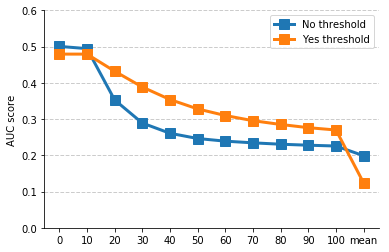

In [7]:
annotations = np.load("Datasets/eBik/annotations.npy").item()
plot(annotations)